<a href="https://colab.research.google.com/github/chiaravanin/CursoCoder/blob/main/ProyectoDS_PArteIVANIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO DATA SCIENCE - PARTE I

✅**ABSTRACT:**
Este proyecto analiza un dataset de clientes de un banco, incluyendo información sociodemográfica, productos contratados, actividad, digitalización y días de uso. El objetivo es explorar patrones de comportamiento, segmentación, identificar relaciones entre productos y características de clientes, y proponer insights que puedan ayudar a la institución a mejorar su estrategia comercial y de retención. A través de visualizaciones interactivas en Python se buscan responder preguntas sobre la distribución de clientes por provincia, edad y género, la contratcion de productos, la digitalizacionos y último uso de productos sobre la cartera total de clientes. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y Pandas.


⁉***Preguntas / Hipótesis de interés***
*Distribución de clientes*
*   ¿Cómo se distribuye la cartera según rangos etarios y género?
*   ¿Qué provincias concentran mayor cantidad de clientes?
*   ¿Existen diferencias en la cantidad de productos contratados según el segmento de cartera?

*Productos bancarios*
*   ¿La tenencia de seguros o plazos fijos varía según la edad o el segmento de cartera?
*  ¿Qué porcentaje de clientes tiene tarjeta de crédito, caja de ahorro en pesos, dólares o caja de seguridad?

*Digitalización y uso*
*   ¿Qué proporción de clientes utiliza canales digitales?
*   ¿La adopción digital cambia significativamente entre provincias o grupos etarios?

In [1]:
from google.colab import drive

In [2]:
import pandas as pd


In [3]:
# 1. Montar Drive en /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Mi Data Frame superaba el limite de tamaño de GitHUb por eso tuve importarlo desde mi google drive

In [4]:
# 2. La ruta del archivo
url = '/content/drive/MyDrive/Coderhouse/DF_ChiaraVanin.csv'

# 3. Leer el CSV con pandas
df = pd.read_csv(url, sep=';')

# 4. Mostrar las primeras filas
df.head(5)

,CANTIDAD_CLIENTES,PROVINCIA,IND_ACTIVO,CANTIDAD_PRODUCTOS,SEGURO,CAJA_SEGURIDAD,CAJA_AHORRO_USD,TJ_CREDITO,PLAZOS_FIJOS,CTA_CTE,CAJA_AHORRO,Rango_Edad_Nuevo,Segmentacion_Carteras,GÉNERO,Segmento_Tarjeta,IND_DIGITAL,ULTIMO_USO,SALDO_DEUDOR
0,1,MENDOZA,Activo,1,No,No,No,No,No,No,Si,Entre 29 y 38 Años,Cartera Haberes,MASCULINO,4 -Internacional,Y,62.0,0.0
1,1,CORDOBA,Activo,6,Si,No,Si,Si,No,Si,Si,Entre 18 y 28 Años,Cartera Haberes,FEMENINO,4 -Internacional,Y,0.0,0.0
2,1,SAN JUAN,Inactivo,2,No,No,No,No,No,No,Si,Entre 59 y 68 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,153.0,0.0
3,1,SANTA CRUZ,Activo,2,No,No,No,Si,No,No,Si,Entre 39 y 48 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,28.0,0.0
4,3,CORRIENTES,Activo,2,No,No,No,No,Si,No,Si,Entre 39 y 48 Años,Cartera Previsional,FEMENINO,NaN,N,3.0,0.0


In [5]:
df.shape #Tamaño de mi Data Frame

(1257673, 18)

In [6]:
df.info() #Info de mi Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CANTIDAD_CLIENTES      1257673 non-null  int64  
 1   PROVINCIA              1257673 non-null  object 
 2   IND_ACTIVO             1257673 non-null  object 
 3   CANTIDAD_PRODUCTOS     1257673 non-null  int64  
 4   SEGURO                 1257673 non-null  object 
 5   CAJA_SEGURIDAD         1257673 non-null  object 
 6   CAJA_AHORRO_USD        1257673 non-null  object 
 7   TJ_CREDITO             1257673 non-null  object 
 8   PLAZOS_FIJOS           1257673 non-null  object 
 9   CTA_CTE                1257673 non-null  object 
 10  CAJA_AHORRO            1257673 non-null  object 
 11  Rango_Edad_Nuevo       1257673 non-null  object 
 12  Segmentacion_Carteras  1231339 non-null  object 
 13  GÉNERO                 1257662 non-null  object 
 14  Segmento_Tarjeta  

In [8]:
df.isnull().sum() #Chequear si hay null


,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


Se observa que hay valores faltantes en columnas como Segmentacion_carteras, segmento_tarjeta y ultimo_uso. Se dejarán o imputarán según necesidad del análisis.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

♀ ♂ Distribución de Clientes por Género


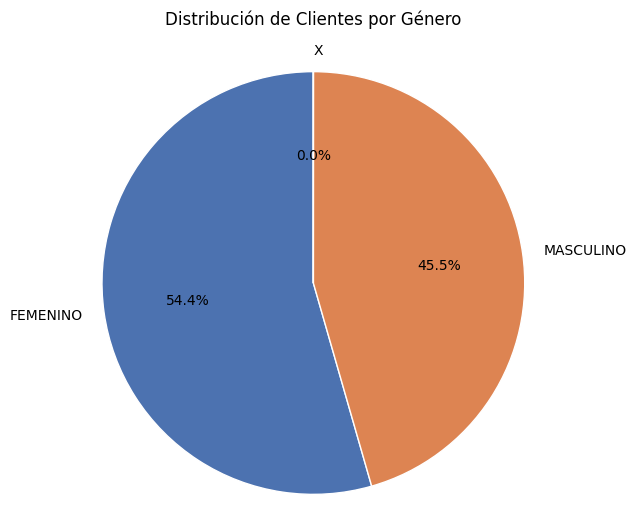

In [10]:
import matplotlib.pyplot as plt #importo para visualizaciones
colors = sns.color_palette('deep')
df_genero = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("Distribución de Clientes por Género", pad=20)
plt.axis('equal')

plt.show()



La distribucion de clientes es bastante equitativa entre mujeres y hombres, pero predomina el genero femenino. Por otro lado  hay un porcentaje que no llega al 1% que no se identifica con los generos tradicionales.

☑  La edad de los clientes bancarizados

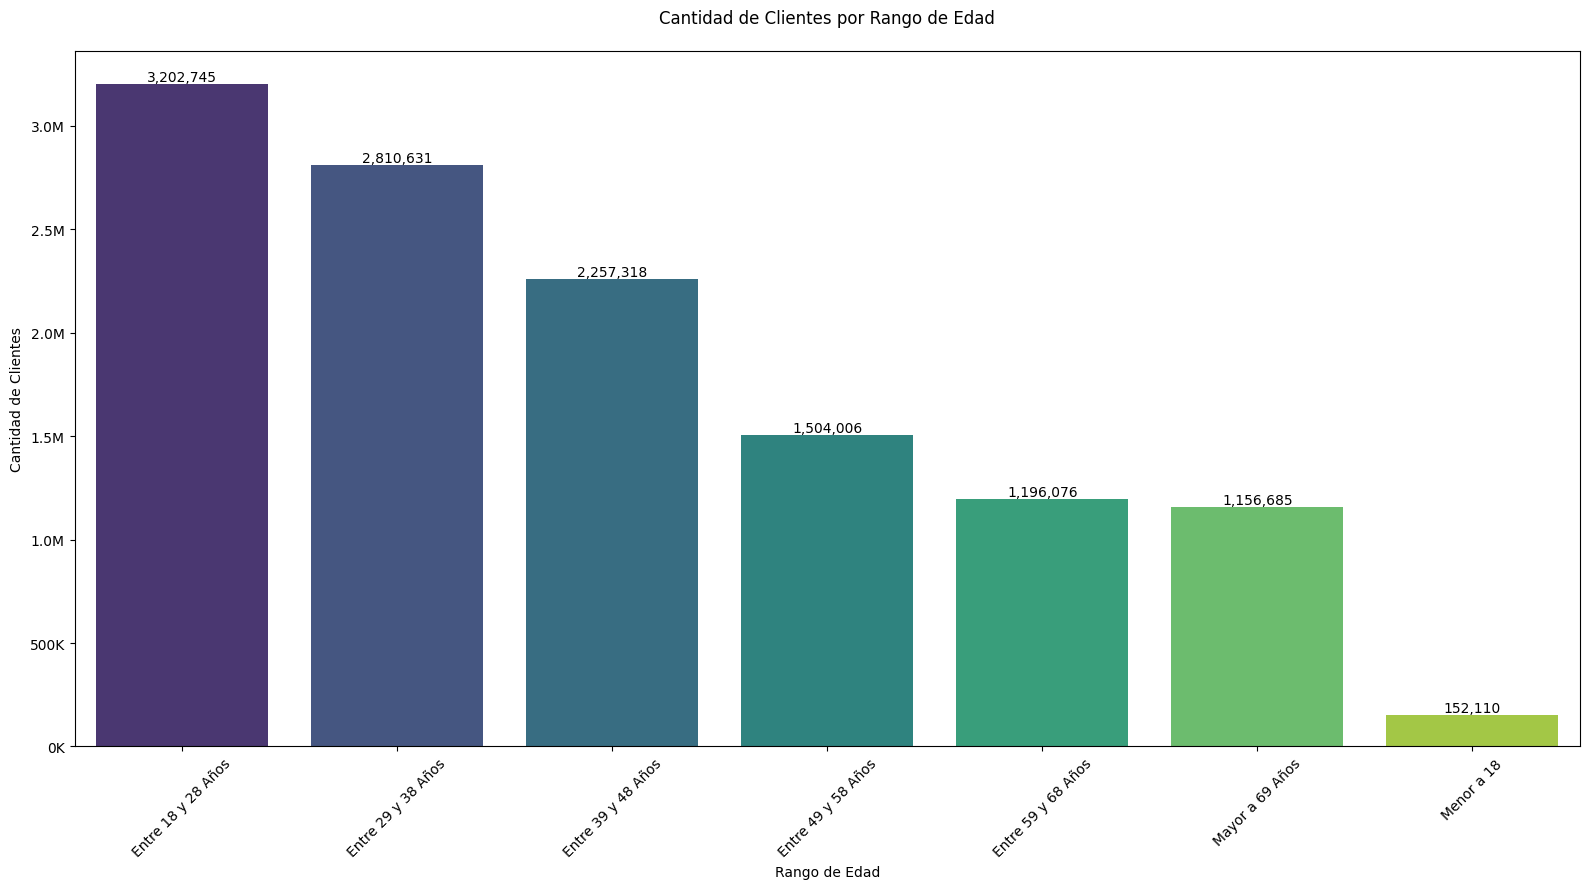

In [11]:
import seaborn as sns


df_edad = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().reset_index()
orden_rangos = df_edad.sort_values('Rango_Edad_Nuevo')['Rango_Edad_Nuevo']

#Grafico
plt.figure(figsize=(16,9))
ax= sns.barplot(x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue= 'Rango_Edad_Nuevo', data=df_edad, order=orden_rangos, palette= 'viridis')
plt.title("Cantidad de Clientes por Rango de Edad", pad=20)
plt.xlabel("Rango de Edad")
plt.ylabel("Cantidad de Clientes")

from matplotlib.ticker import FuncFormatter  #lo importe para luego poder corregir la unidad del eje y
def formato_miles(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # millones con 1 decimal
    else:
        return f'{x*1e-3:.0f}K'  # miles sin decimales

ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xticks(rotation=45)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # pasar a numero a entero
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición sobre la barra
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


plt.show()


↪ Los jóvenes adultos (18 a 38 años) representan casi la mitad de la cartera, con un gran potencial de vinculación digital

Top 10 - Provincias con mas clientes

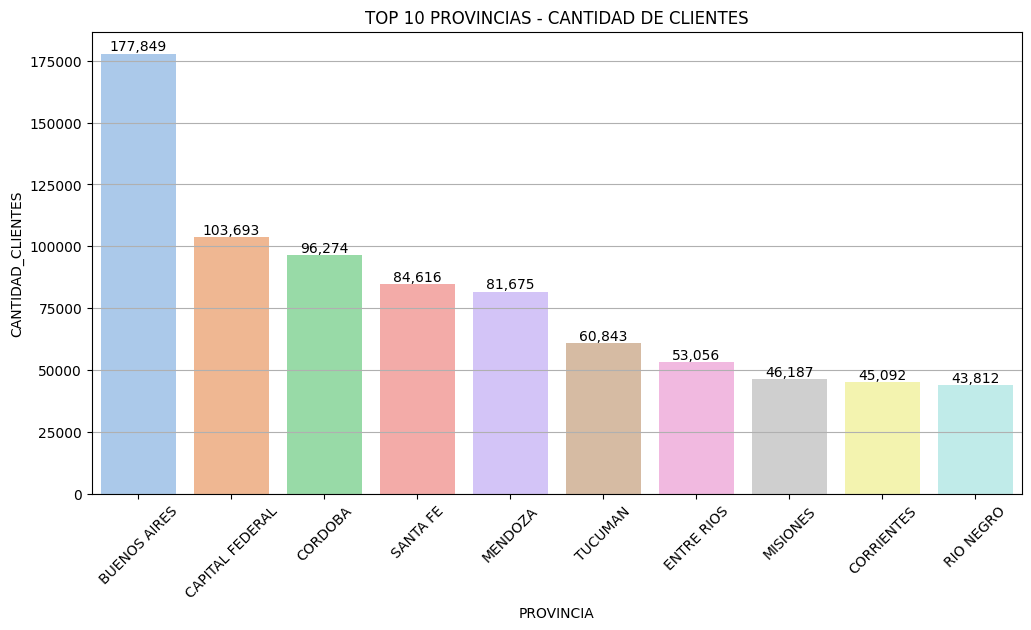

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 provincias por cantidad de clientes
top_provincias = df['PROVINCIA'].value_counts().head(10).index
df_top = df[df['PROVINCIA'].isin(top_provincias)]

# Contar cantidad de clientes por provincia
provincia_counts = df_top['PROVINCIA'].value_counts().reset_index()
provincia_counts.columns = ['PROVINCIA', 'CANTIDAD_CLIENTES']

# Gráfico
plt.figure(figsize=(12,6))
ax= sns.barplot(data=provincia_counts, x='PROVINCIA', hue= 'PROVINCIA', y='CANTIDAD_CLIENTES', palette='pastel')
plt.title('TOP 10 PROVINCIAS - CANTIDAD DE CLIENTES')
plt.xticks(rotation=45)
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # convertimos a int
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()


Ademas de ver como se compone la cartera del Top 10 de Provincias, se puede analizar la actividad de esos clientes.

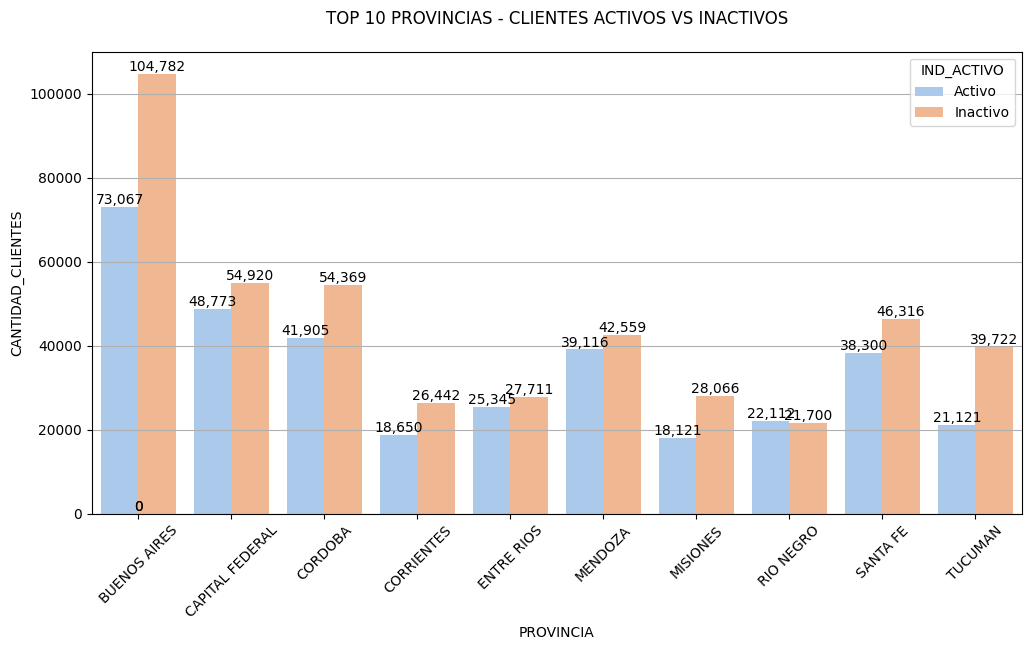

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 provincias por cantidad de clientes
top_provincias = df['PROVINCIA'].value_counts().head(10).index
df_top = df[df['PROVINCIA'].isin(top_provincias)]

# Incorporar el Indicador de actividad
provincia_estado = df_top.groupby(['PROVINCIA', 'IND_ACTIVO']).size().reset_index(name='CANTIDAD_CLIENTES')

# Gráfico de barras con hue por estado activo
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=provincia_estado,
    x='PROVINCIA',
    y='CANTIDAD_CLIENTES',
    hue='IND_ACTIVO',   # para distinguir entre activos e inactivos
    palette='pastel'
)

plt.title('TOP 10 PROVINCIAS - CLIENTES ACTIVOS VS INACTIVOS', pad=20)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Etiqueta de datos
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()


↪ Esta visualizacion nos permite interpretar que las provincias con los stock de clientes mayores, tienen una necesidad de reaactivar la actividad, ya que en gran proporcion los clientes son inactivos.

▶ Cantidad de clientes de acuerdo a la Cartera

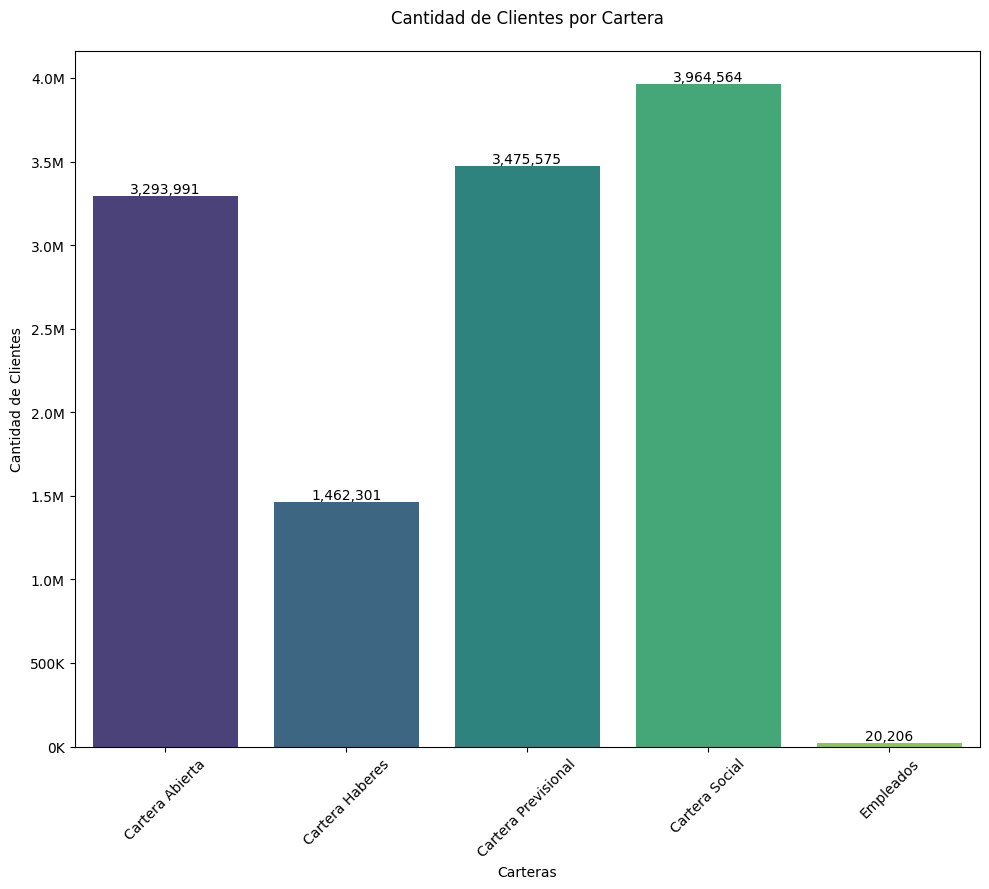

In [21]:
import seaborn as sns


df_carteras = df.groupby('Segmentacion_Carteras')['CANTIDAD_CLIENTES'].sum().reset_index()


#Grafico
plt.figure(figsize=(10,9))
ax= sns.barplot(x='Segmentacion_Carteras', y='CANTIDAD_CLIENTES', hue= 'Segmentacion_Carteras', data=df_carteras, palette= 'viridis')
plt.title("Cantidad de Clientes por Cartera", pad=20)
plt.xlabel("Carteras")
plt.ylabel("Cantidad de Clientes")

from matplotlib.ticker import FuncFormatter  #lo importe para luego poder corregir la unidad del eje y
def formato_miles(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # millones con 1 decimal
    else:
        return f'{x*1e-3:.0f}K'  # miles sin decimales

ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xticks(rotation=45)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # pasar a numero a entero
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición sobre la barra
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


plt.show()

▶ ACTIVIDAD POR CARTERA

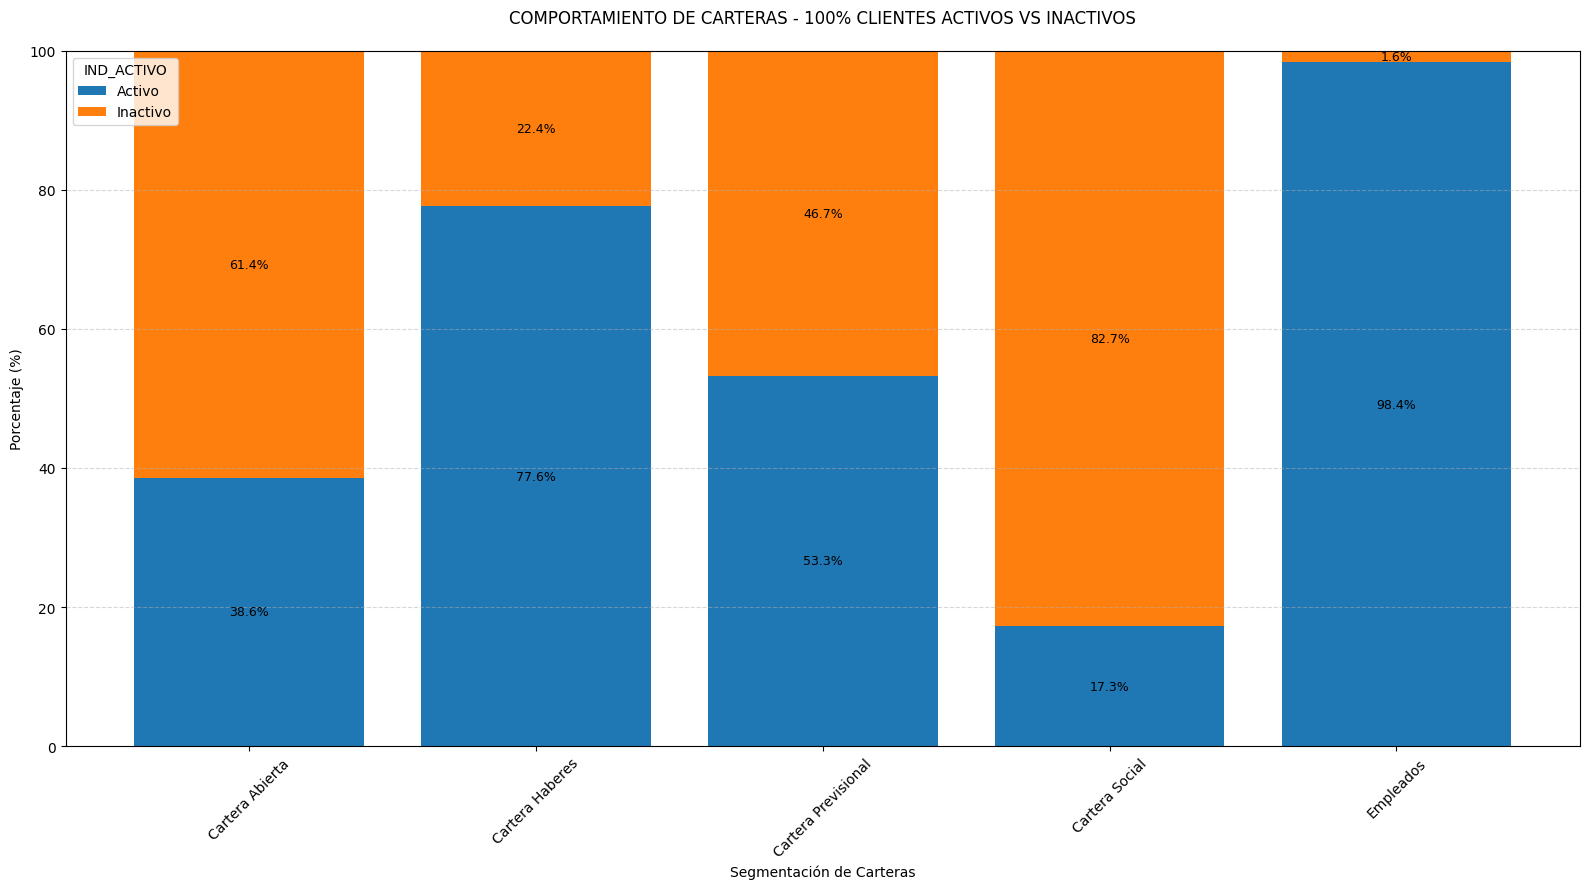

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupo por cartera y convierto en porcentajes
carteras_actividad = (
    df.groupby(['Segmentacion_Carteras', 'IND_ACTIVO'])
      .size()
      .reset_index(name='CANTIDAD_CLIENTES')
)

carteras_actividad['PORCENTAJE'] = (
    carteras_actividad.groupby('Segmentacion_Carteras')['CANTIDAD_CLIENTES']
    .transform(lambda x: x / x.sum() * 100)
)

# Incluyo el indicador de actividad
pivot_df = carteras_actividad.pivot(index='Segmentacion_Carteras',
                                    columns='IND_ACTIVO',
                                    values='PORCENTAJE').fillna(0)

# Grafico de barras apiladas al 100%
plt.figure(figsize=(16,9))

bottom = None
for col in pivot_df.columns:
    plt.bar(
        pivot_df.index,
        pivot_df[col],
        bottom=bottom,
        label=str(col)
    )
    # Actualizar bottom para apilar la siguiente serie
    bottom = pivot_df[col] if bottom is None else bottom + pivot_df[col]

plt.title('COMPORTAMIENTO DE CARTERAS - 100% CLIENTES ACTIVOS VS INACTIVOS', pad=20)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Segmentación de Carteras')
plt.xticks(rotation=45)
plt.legend(title='IND_ACTIVO')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 100)

# Etiquetas de datos
for idx, row in pivot_df.iterrows():
    cumulative = 0
    for col in pivot_df.columns:
        height = row[col]
        if height > 0:  # solo mostrar si hay datos
            plt.text(
                x=idx,
                y=cumulative + height / 2,
                s=f"{height:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
        cumulative += height

plt.tight_layout()
plt.show()


↪ La Cartera Haberes es la más sólida: sus clientes son mayoritariamente activos, consolidándose como un segmento de referencia.

Otro analisis es la cantidad de productos contratados de acuerdo a la Cartera a la que pertenecen.

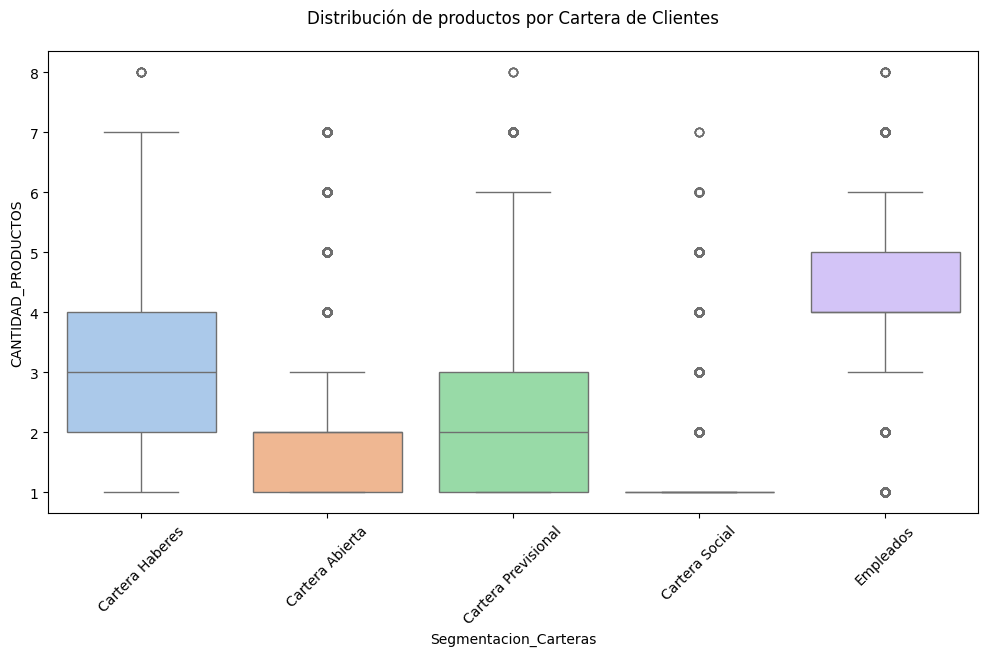

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Segmentacion_Carteras', y='CANTIDAD_PRODUCTOS' , hue='Segmentacion_Carteras', data=df, palette='pastel')
plt.title('Distribución de productos por Cartera de Clientes', pad=20)
plt.xticks(rotation=45)
plt.legend().set_visible(False)

plt.show()


↪ Con esta visualizacion podemos interpretar que:
La Cartera Haberes tiene una mediana de 3 productos.
La mayoría de los clientes tienen entre 2 y 4 productos. Y hay algunos outliers que compran hasta 7-8 productos.
Cartera Abierta tiene una mediana igual a 1 producto. La distribución es más concentrada; la mayoría tienen 1-2 productos. Algunos clientes compran hasta 6 productos, serian outliers.
Por otro lado, la Cartera Previsional con una mediana de 2 productos. Un Rango intercuartílico de 1 a 3 productos, y varios outliers hasta 6-7 productos.
La Cartera Social logicamente tiene una mediana de 1 producto y outliers hasta 7 productos, casos a revisar.
Los Empleados de la entidad se les ofrece los paquetes completos por eso la Mediana ≈ 4 productos, y un rango intercuartílico: 4 a 5 productos.

DIGITALIZACION DE CLIENTES

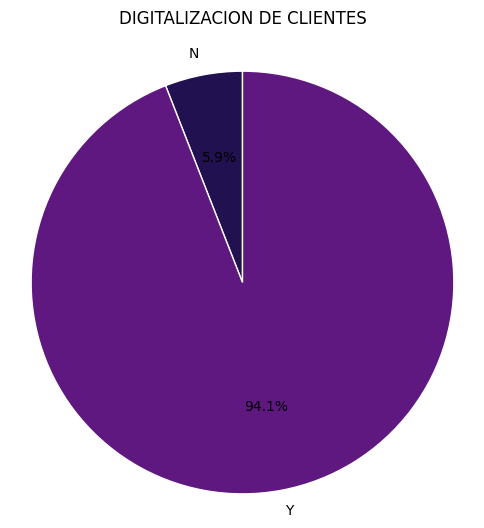

In [ ]:
colors = sns.color_palette('magma')
df_genero = df.groupby('IND_DIGITAL')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("DIGITALIZACION DE CLIENTES", pad=20)
plt.axis('equal')

plt.show()


El 94% de los clientes utiliza un canal digital para operar con el banco.

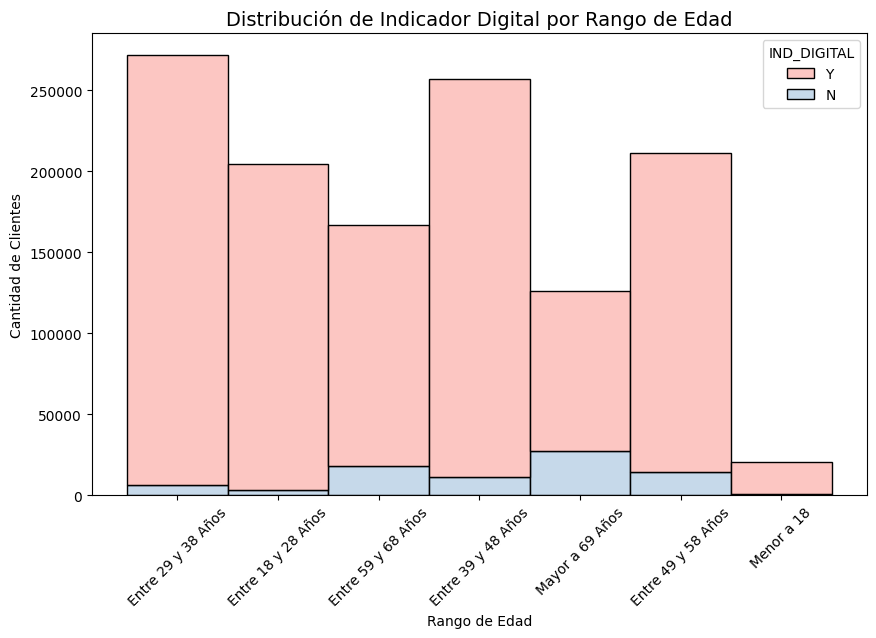

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Rango_Edad_Nuevo', hue='IND_DIGITAL', multiple='stack', palette='Pastel1')

plt.title('Distribución de Indicador Digital por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()


Esta visualizacion demuestra que los clientes jovenes son los que mayor proporcion de digitalizacion tienen.

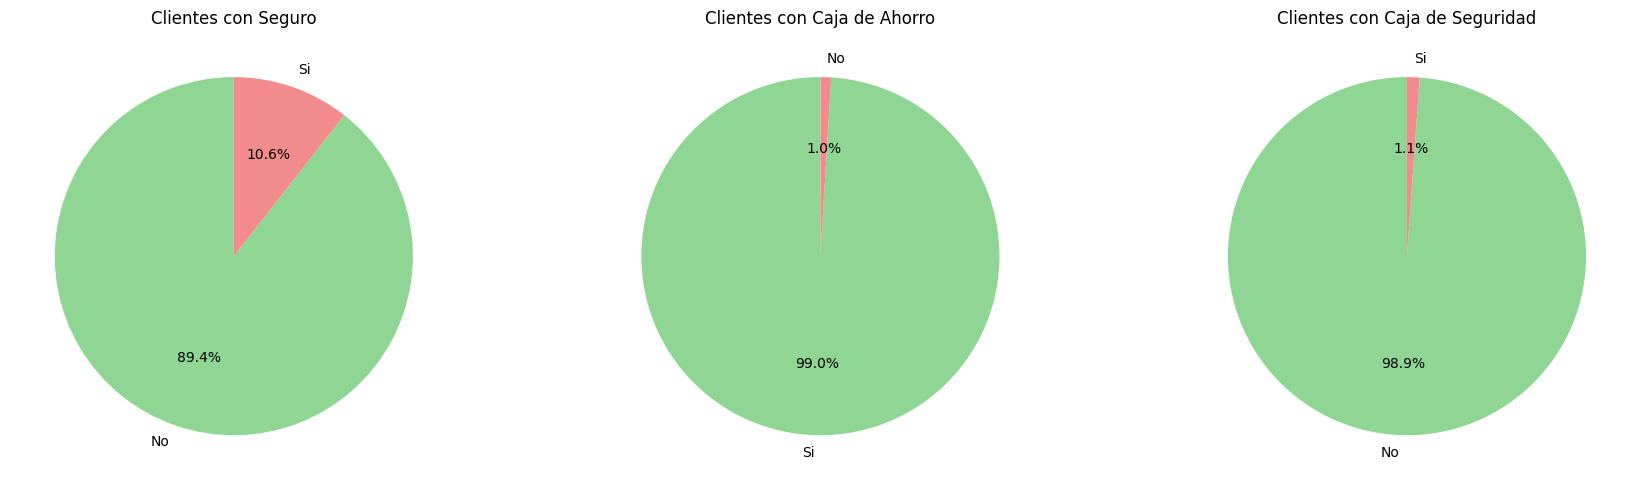

In [29]:
import matplotlib.pyplot as plt

# Clientes por cada tipo de producto
seguro_counts = df['SEGURO'].value_counts()
caja_ahorro_counts = df['CAJA_AHORRO'].value_counts()
caja_seguridad_counts = df['CAJA_SEGURIDAD'].value_counts()
# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Seguro ---
axes[0].pie(
    seguro_counts,
    labels=seguro_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']  # verde para "Si", rojo para "No"
)
axes[0].set_title('Clientes con Seguro')

# Caja de Ahorro ---
axes[1].pie(
    caja_ahorro_counts,
    labels=caja_ahorro_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']
)
axes[1].set_title('Clientes con Caja de Ahorro')

# Caja de Seguridad ---
axes[2].pie(
    caja_seguridad_counts,
    labels=caja_seguridad_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']
)
axes[2].set_title('Clientes con Caja de Seguridad')
plt.tight_layout()
plt.show()


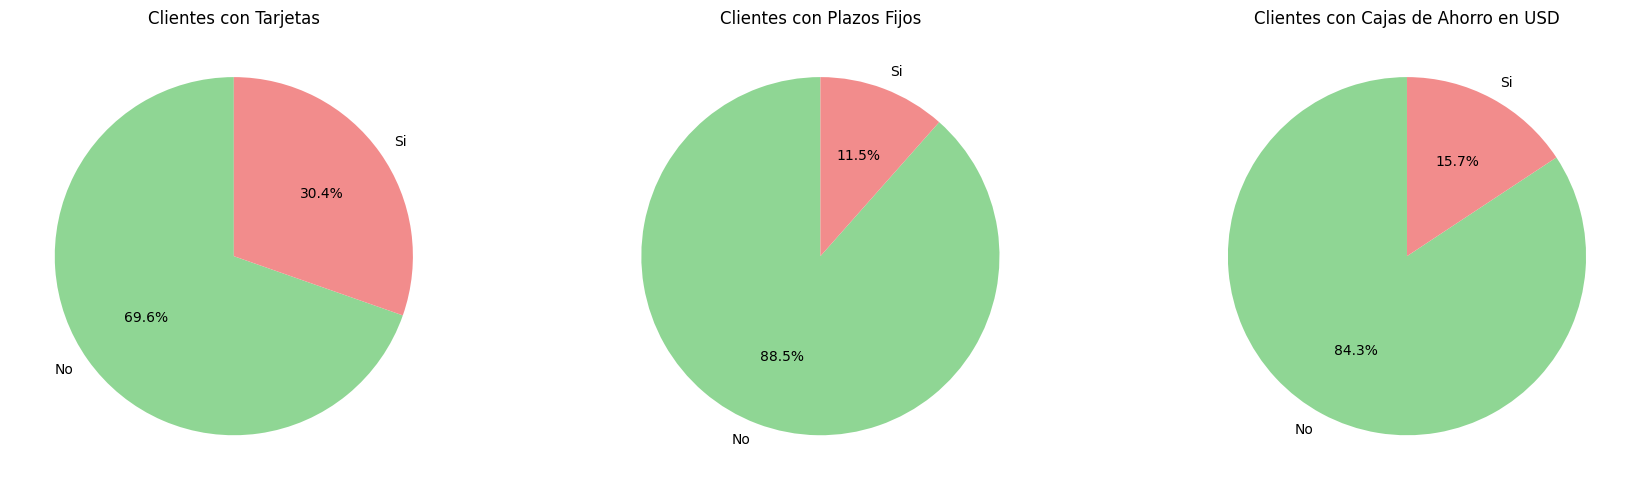

In [32]:
import matplotlib.pyplot as plt

# Clientes por cada tipo de producto
Tj_credito_counts = df['TJ_CREDITO'].value_counts()
Plazo_fijo_counts = df['PLAZOS_FIJOS'].value_counts()
caja_ahorroUSD_counts = df['CAJA_AHORRO_USD'].value_counts()

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tarjetas de Crédito
axes[0].pie(
    Tj_credito_counts,
    labels=Tj_credito_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']
)
axes[0].set_title('Clientes con Tarjetas')

# Plazos Fijos
axes[1].pie(
    Plazo_fijo_counts,
    labels=Plazo_fijo_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']
)
axes[1].set_title('Clientes con Plazos Fijos')

# Cajas de Ahorro en Dólares
axes[2].pie(
    caja_ahorroUSD_counts,
    labels=caja_ahorroUSD_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8fd694', '#f28c8c']
)
axes[2].set_title('Clientes con Cajas de Ahorro en USD')

plt.tight_layout()
plt.show()
